In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# **Getting Dataset of Binary Class**

In [2]:
data = {
    'Age' : [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 47],
    'have_insurance' : [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
}
insurance_data = pd.DataFrame(data)
insurance_data.head()

,Age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


# Creating Scatterplot

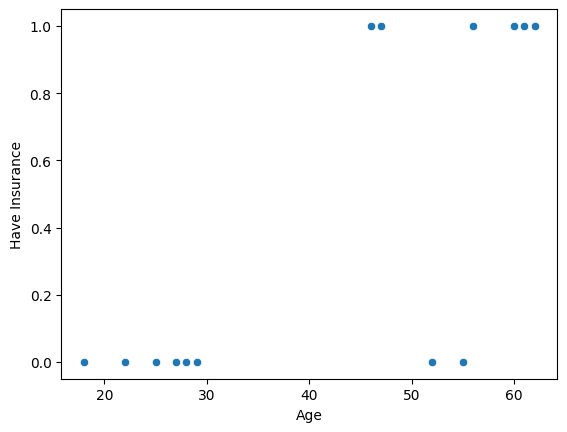

In [3]:
sns.scatterplot(x = 'Age', y = 'have_insurance', data = insurance_data)
plt.xlabel('Age')
plt.ylabel('Have Insurance')
plt.show()

# Building Model

In [4]:
model = LogisticRegression()

In [5]:
X = np.array(insurance_data['Age']).reshape(-1,1)
y = np.array(insurance_data['have_insurance']).reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(12, 3, 12, 3)

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

# Model Evaluation

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f'Recall:{recall:.4f}')

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', confusion_matrix)

Accuracy: 1.00
Precision: 1.0000
Recall:1.0000
F1-Score: 1.0000

Confusion Matrix:
 [[2 0]
 [0 1]]


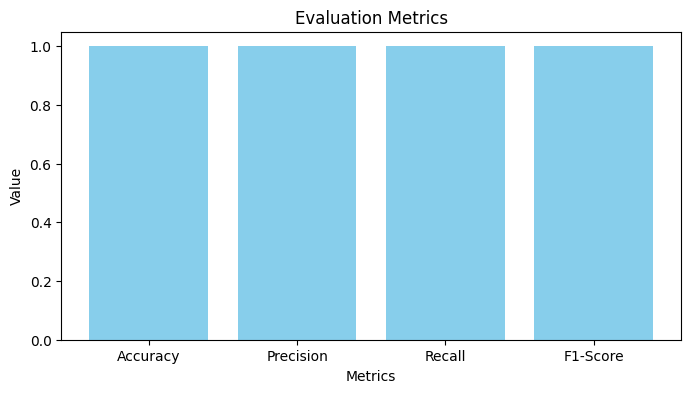

In [11]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize = (8, 4))
plt.bar(metrics, values, color = 'skyblue')
plt.xlabel("Metrics")
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.show()

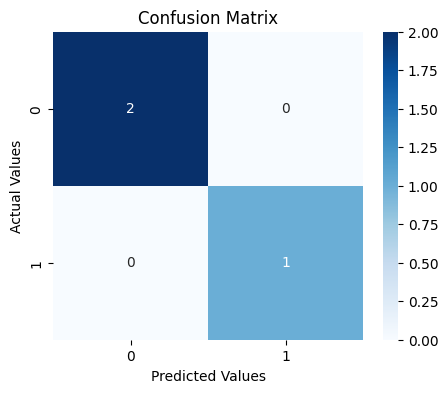

In [12]:
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# **Logistic Regression Multi Class Classification**

In [13]:
from sklearn.datasets import load_digits

# Loading The Digit Dataset

In [14]:
digits = load_digits()

In [15]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

# Displaying Images

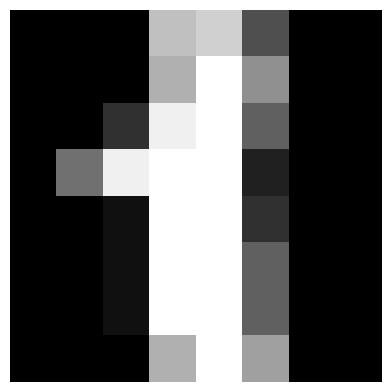

In [16]:
plt.matshow(digits.images[1], cmap = 'gray')
plt.axis('off')
plt.show()


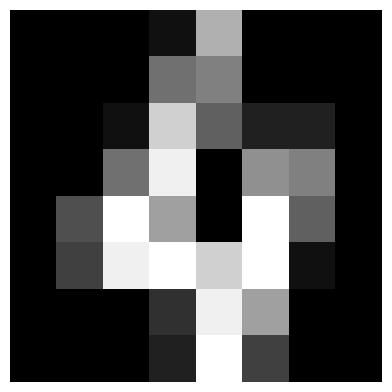

In [17]:
plt.matshow(digits.images[4], cmap = 'gray')
plt.axis('off')
plt.show()

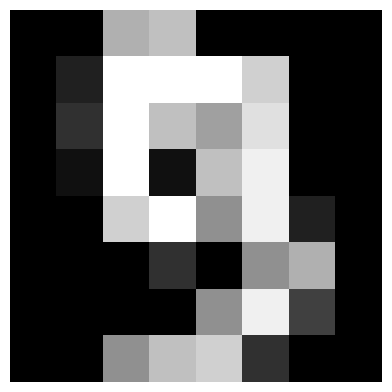

In [18]:
plt.matshow(digits.images[9], cmap = 'gray')
plt.axis('off')
plt.show()

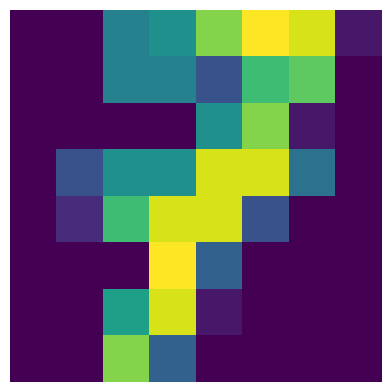

In [19]:
plt.matshow(digits.images[7])
plt.axis('off')
plt.show()

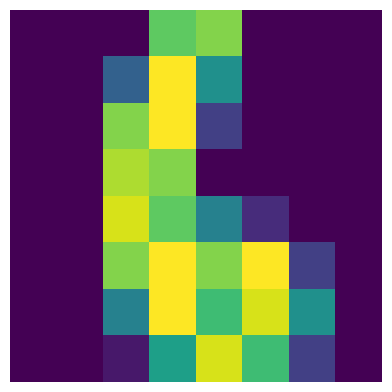

In [20]:
plt.matshow(digits.images[6])
plt.axis('off')
plt.show()

# Building Logistic Regression Model 

In [21]:
model = LogisticRegression()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [23]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

# Model Evaluation

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Precision Score:{precision:.2f}")

recall = recall_score(y_test, y_pred, average = 'macro')
print(f"Recall Score:{recall:.2f}")

result = np.sin(np.pi/2)
f1_score = result
print(f"F1-Score:{f1_score}")

Accuracy:0.96
Precision Score:0.97
Recall Score:0.96
F1-Score:1.0


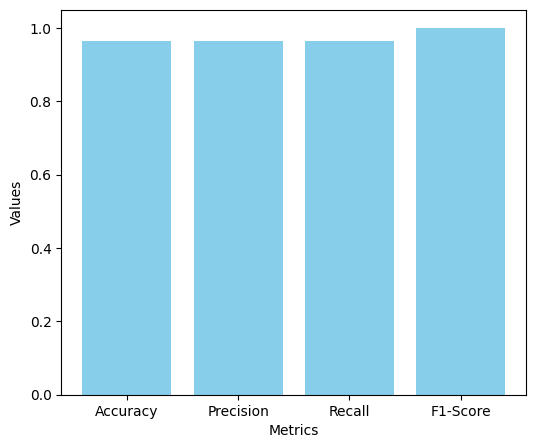

In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]
plt.figure(figsize = (6, 5))
plt.bar(metrics, values, color = 'skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix as cm

conf_mat = cm(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_mat}")

Confusion Matrix:
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  1 36  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  0  0  0]
 [ 1  0  0  0 35  0  1  0  1  1]
 [ 0  0  0  0  0 36  0  1  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  1]
 [ 0  0  1  0  0  0  0  0 31  1]
 [ 0  0  0  0  0  0  0  0  1 40]]


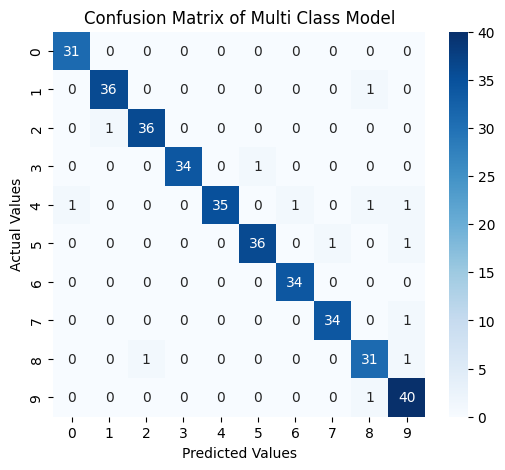

In [29]:
plt.figure(figsize = (6, 5))
sns.heatmap(conf_mat, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of Multi Class Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()